In [1]:
# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

사전 훈련된 신경망 다운로드

1. https://github.com/tensorflow/models
2. https://www.tensorflow.org/resources/models-datasets
3. https://github.com/jtoy/awesome-tensorflow

# numpy처럼 텐서플로우 사용하기

In [2]:
tf.constant([
    [1., 2., 3.],
    [4., 5., 6.]
]) #행렬 2차원 텐서

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42) #스칼라, 0차원 텐서

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [5]:
t = tf.constant([
    [1., 2., 3.],
    [4., 5., 6.]
])

t.shape, t.dtype

(TensorShape([2, 3]), tf.float32)

In [6]:
t[:, 1:] #전체 행에서 두번째 열부터 끝까지

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [9]:
t[:], t[...]

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 2., 3.],
        [4., 5., 6.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 2., 3.],
        [4., 5., 6.]], dtype=float32)>)

In [10]:
t[:, 1], t[..., 1]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>)

In [17]:
#newaxis는 새로운 차원 추가

a = np.arange(3)
b = a[np.newaxis, :] #행 차원 추가
c= a[:, np.newaxis] #열 차원 추가

a, b, c, a.shape, b.shape, c.shape

(array([0, 1, 2]),
 array([[0, 1, 2]]),
 array([[0],
        [1],
        [2]]),
 (3,),
 (1, 3),
 (3, 1))

In [18]:
t[:, 1], t[..., 1], t[..., 1, tf.newaxis], t[:, 1, tf.newaxis]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>,
 <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[2.],
        [5.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[2.],
        [5.]], dtype=float32)>)

In [19]:
#텐서 연산도 가능

t, t + 10, tf.square(t), tf.transpose(t), t @ tf.transpose(t) #@는 행렬 곱셈 = tf.matmul()

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 2., 3.],
        [4., 5., 6.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[11., 12., 13.],
        [14., 15., 16.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[ 1.,  4.,  9.],
        [16., 25., 36.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[1., 4.],
        [2., 5.],
        [3., 6.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[14., 32.],
        [32., 77.]], dtype=float32)>)

텐서플로우와 넘파이의 연산이 비슷해보이지만 다른 작업을 수행하는 경우가 있음. 주의!

### 텐서와 numpy

numpy 배열 <-> 텐서

In [20]:
a = np.array([2., 4., 5.])
tf.constant(a), t.numpy, tf.square(a), np.square(t)

(<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>,
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 2., 3.],
        [4., 5., 6.]], dtype=float32)>>,
 <tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>,
 array([[ 1.,  4.,  9.],
        [16., 25., 36.]], dtype=float32))

numpy는 기본으로 64비트 정밀도를 사용하지만, 텐서플로우는 32비트 정밀도 사용.

numpy배열로 텐서를 만들 때는 dtype=tf.float32를 지정해야 함.

### 타입 변환

텐서플로우는 어떤 타입 변환도 자동으로 하지 않음

호환되지 않는 타입의 연산은 예외 발생(실수 + 정수)

In [21]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]

In [22]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### 변수

In [23]:
#텐서(tf.Tensor)는 변경이 불가능한 객체
#변경가능한 tf.Variable이 있음
#내부적으로 tf.Tensor를 사용하며, 값이 변경되면 새로운 텐서가 만들어 짐.

v = tf.Variable([
    [1., 2., 3.,],
    [4., 5., 6.]
])

v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [24]:
#텐서와 동일하지만 assign()을 사용해 값을 변경할 수 있음

v.assign(2 * v)
v[0, 1].assign(42)

v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [25]:
v[:, 2].assign([0., 1.])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [26]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

### 문자열

In [29]:
t = tf.constant("텐서플로우")

u = tf.constant([ord(c) for c in "텐서플로우"])

u

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([53584, 49436, 54540, 47196, 50864])>

In [32]:
b = tf.strings.unicode_encode(u, "UTF-8")
b, tf.strings.length(b, unit="UTF8_CHAR")

(<tf.Tensor: shape=(), dtype=string, numpy=b'\xed\x85\x90\xec\x84\x9c\xed\x94\x8c\xeb\xa1\x9c\xec\x9a\xb0'>,
 <tf.Tensor: shape=(), dtype=int32, numpy=5>)

In [33]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([53584, 49436, 54540, 47196, 50864])>

### 문자열 배열

In [35]:
p = tf.constant(["카페", "커피", "아메리카노"])

In [36]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 2, 5])>

In [38]:
r = tf.strings.unicode_decode(p, "UTF8")

r

<tf.RaggedTensor [[52852, 54168], [52964, 54588], [50500, 47700, 47532, 52852, 45432]]>

### 레그드 텐서(ragged)

리스트의 리스트

In [40]:
r[1], r[1:]

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([52964, 54588])>,
 <tf.RaggedTensor [[52964, 54588], [50500, 47700, 47532, 52852, 45432]]>)

In [42]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[52852, 54168], [52964, 54588], [50500, 47700, 47532, 52852, 45432], [65, 66], [], [67]]>


In [44]:
r3 = tf.ragged.constant([
    [0, 0, 0],
    [0],
    []
])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[52852, 54168, 0, 0, 0], [52964, 54588, 0], [50500, 47700, 47532, 52852, 45432]]>


In [45]:
r.to_tensor()

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[52852, 54168,     0,     0,     0],
       [52964, 54588,     0,     0,     0],
       [50500, 47700, 47532, 52852, 45432]])>

### 희소 텐서

대부분 0으로 채워진 텐서

In [47]:
s = tf.SparseTensor(indices=[    
                                [0, 1], #0 이외의 값이 들어갈 위치
                                [1, 0],
                                [2, 3]
                            ],
                   values=[1., 2., 3.], #각각의 인덱스에 들어갈 값들
                   dense_shape=[3, 4])  #회소 텐서 크기

print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [48]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [50]:
s2 = s * 2.0
tf.sparse.to_dense(s2)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 0., 0.],
       [4., 0., 0., 0.],
       [0., 0., 0., 6.]], dtype=float32)>

In [51]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [52]:
s4 = tf.constant([
    [10., 20.],
    [30., 40.],
    [50., 60.],
    [70., 80.],
])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [54]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                    values=[1., 2.],
                    dense_shape=[3, 4])

In [55]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [56]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### 텐서 배열

In [57]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [58]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [59]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [60]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean, variance

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>)

# 사용자 정의 손실 함수

In [61]:
# 캘리포이나 주택 가격 데이터

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [62]:
#후버 손실

def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

#성능을 위해 벡터화 하여 구현, 텐서플로우 연산만 사용

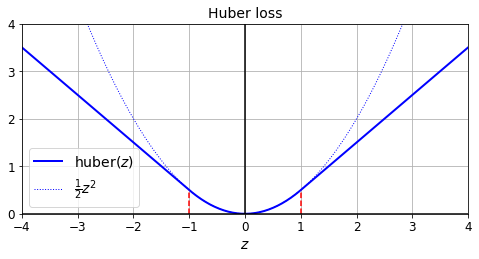

In [63]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [65]:
X_train.shape, X_train.shape[1:]

((11610, 8), (8,))

In [66]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [67]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [68]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.6235 - mae: 0.9953 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 0s 904us/step - loss: 0.2197 - mae: 0.5177 - val_loss: 0.2382 - val_mae: 0.5281


### 사용자 정의 요소를 가진 모델을 저장하고 로드하기

In [69]:
model.save("my_model_with_a_custom_loss.h5")

In [70]:
#함수 이름을 저장하므로, 함수 이름에 대해 실제 함수 매핑

model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

In [71]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2054 - mean_absolute_error: 0.4982 - val_loss: 0.2209 - val_mean_absolute_error: 0.5050
Epoch 2/2
363/363 [==============================] - 0s 926us/step - loss: 0.1999 - mean_absolute_error: 0.4900 - val_loss: 0.2127 - val_mean_absolute_error: 0.4986


In [72]:
#위 예시 처럼 직접 함수 매핑을 피하기 위해서 keras.losses.Loss 클래스 상속 및 get_config메서드 구현하여 해결

class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [74]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [75]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.7864 - mae: 0.9470 - val_loss: 0.4276 - val_mae: 0.6122
Epoch 2/2
363/363 [==============================] - 0s 928us/step - loss: 0.2497 - mae: 0.5204 - val_loss: 0.3437 - val_mae: 0.5537


In [76]:
model.save("my_model_with_a_custom_loss_class.h5")

In [77]:
#모델을 로드할 때 클래스 이름과 클래스 자체를 매핑해야
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5", 
                                custom_objects={"HuberLoss": HuberLoss})

In [78]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2328 - mean_absolute_error: 0.5019 - val_loss: 0.2627 - val_mean_absolute_error: 0.5015
Epoch 2/2
363/363 [==============================] - 0s 915us/step - loss: 0.2234 - mean_absolute_error: 0.4931 - val_loss: 0.2037 - val_mean_absolute_error: 0.4739


In [80]:
model.loss.threshold

2.0

### 그외 사용자 정의 함수

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
def my_softplus(z): # tf.nn.softplus(z) 값을 반환합니다
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # tf.nn.relu(weights) 값을 반환합니다
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [83]:
# 사용자 정의 함수는 보통의 함수와 동일하게 사용 가능

layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,     #훈련 스텝마다 가중치가 규제 함수에 전달되어 규제 손실 계산
                           kernel_constraint=my_positive_weights)    #훈련 스텝마다 제한 함수가 호출되어 가중치를 제한한 값으로 바꿈

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [86]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [87]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [88]:
model.save("my_model_with_many_custom_parts.h5")

In [89]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [90]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [91]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [93]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [94]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 0s 1ms/step - loss: 1.5542 - mae: 0.8962 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 0s 898us/step - loss: 0.5943 - mae: 0.5256 - val_loss: 1.4399 - val_mae: 0.5137


In [95]:
model.save("my_model_with_many_custom_parts.h5")

In [96]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

### 사용자 정의 지표

In [97]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [98]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [100]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [101]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 0s 628us/step - loss: 2.0982 - huber_fn: 0.9192
Epoch 2/2
363/363 [==============================] - 0s 606us/step - loss: 0.6052 - huber_fn: 0.2733


손실 = 지표 * 샘플 가중치의 평균

In [102]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [103]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 0s 697us/step - loss: 0.1175 - huber_fn: 0.2399
Epoch 2/2
363/363 [==============================] - 0s 667us/step - loss: 0.1131 - huber_fn: 0.2297


In [104]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11749906837940216, 0.11906625573138947)

### 스트리밍 지표(상태가 있는 지표)

In [109]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

#양성 예측 5개 중에 4개 일치 -> 정밀도 80%

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [110]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

#두번째 에측은 양성 예측 3개 중 0개 일치

#양성 예측 5+3개 중에 4개가 일치하였으므로 전체 정밀도는 50%

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

배치 마다 점진적으로 업데이트 되기 때문에(지금까지의 전체 정밀도 계산) 스트리밍 지표라고 부름

In [111]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [112]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [113]:
precision.reset_states() #모두 0.0으로 리셋

In [114]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # 기본 매개변수 처리 (예를 들면, dtype)
        self.threshold = threshold
        #self.huber_fn = create_huber(threshold) # TODO: investigate why this fails
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def huber_fn(self, y_true, y_pred): # 대체 방법
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [115]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

### 사용자 정의 층

In [116]:
# 입력에 지수 함수를 적용하는 층

exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [117]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [118]:
#회귀 모델이 예측할 값이 양수이고, 스케일이 매우 다른 경우 출력층에 추가하면 유용할 수 있다.

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [121]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 0s 961us/step - loss: 228808.5469 - val_loss: 1577.0658
Epoch 2/5
363/363 [==============================] - 0s 818us/step - loss: 2.8074 - val_loss: 73.8119
Epoch 3/5
363/363 [==============================] - 0s 848us/step - loss: 2.4692 - val_loss: 7.2706
Epoch 4/5
363/363 [==============================] - 0s 824us/step - loss: 2.3925 - val_loss: 2.8548
Epoch 5/5
162/162 [==============================] - 0s 457us/step - loss: 205.7819


205.7818603515625

In [122]:
#Dense 층의 간소화 버전 구현

class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [123]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [124]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [125]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 0s 1000us/step - loss: 2.2563 - val_loss: 0.9472
Epoch 2/2
162/162 [==============================] - 0s 543us/step - loss: 0.5474


0.5473726987838745

In [126]:
model.save("my_model_with_a_custom_layer.h5")

In [127]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [128]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [129]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [130]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

In [131]:
# 훈련과 테스트에서 다르게 동작한는 층

class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [132]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 0s 970us/step - loss: 0.4904 - val_loss: 0.5329
Epoch 2/2
162/162 [==============================] - 0s 543us/step - loss: 0.3990


0.39900389313697815

In [133]:
X_new_scaled = X_test_scaled

In [134]:
#출력에 입력으로 들어온 값을 더하는 잔차블록

class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [135]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [136]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [137]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 0s 1ms/step - loss: 9.1325
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 1.0578
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.8869
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5831
Epoch 5/5
162/162 [==============================] - 0s 611us/step - loss: 0.6511


In [138]:
model.save("my_custom_model.ckpt")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


In [139]:
model = keras.models.load_model("my_custom_model.ckpt")

In [140]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 0s 1ms/step - loss: 0.8047
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5549
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4452
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5513
Epoch 5/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5905


In [141]:
# 사용자 정의 모델 대신에 시퀀셜 API를 사용하는 모델 정의

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [142]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [143]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 0s 953us/step - loss: 0.8695
Epoch 2/5
363/363 [==============================] - 0s 895us/step - loss: 0.4720
Epoch 3/5
363/363 [==============================] - 0s 882us/step - loss: 0.5537
Epoch 4/5
363/363 [==============================] - 0s 890us/step - loss: 0.3809
Epoch 5/5
162/162 [==============================] - 0s 556us/step - loss: 0.4852


### 자동 미분을 사용하여 그래디언트 계산하기

In [144]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [145]:
w1, w2 = 5, 3 #5, 3에서의 그래디언트 벡터는 36, 10
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [146]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [147]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)

with tf.GradientTape() as tape:
    z = f(w1, w2)  #tape를 이용해서 이 변수와 관련된 모든 사항을 기록

#두 변수 [w1, w2]에 대한 z의 그래디언트 가져오기
gradients = tape.gradient(z, [w1, w2])

In [148]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [149]:
#graident호출 즉시 기록된 내용을 지워짐

with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


In [150]:
with tf.GradientTape(persistent=True) as tape: #지속 가능한 테이프 생성
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape  #반드시 사용이 끝난 후 삭제!

In [151]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [152]:
c1, c2 = tf.constant(5.), tf.constant(3.) #변수가 포함된 연산만 기록
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2]) #변수가 아니라 contant이므로 None리턴

gradients

[None, None]

In [153]:
with tf.GradientTape() as tape: #테이프가 기록하도록 강제
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

그래디언트 테이프는 여러 값(모델 파라미터)에 대한 하나의 값(손실)의 그래디언트를 계산

후진 모드 자동 미분이 적합

In [155]:
#일부분의 역전파 막기

def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

### 사용자 정의 훈련 반복

드물게 fit() 메서드의 유연성이 충분하지 않을 때

ex: 딥 & 와이드 네트워크에서 각각 다른 옵티마이저를 사용할 때

In [156]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [157]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [158]:
#훈련 세트에서 샘플 배치를 랜덤하게 추출

def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [159]:
#훈련 상태 출력

def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)

In [160]:
import time

mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 - loss: 0.0900 - mean_square: 858.5000


In [161]:
#진행도 까지 표시

def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

In [162]:
progress_bar(3500, 10000, size=6)

' 3500/10000 [=>....]'

In [163]:
def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

In [164]:
mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 [==============================] - loss: 0.0900 - mean_square: 858.5000


In [165]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [166]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [167]:
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11610/11610 [==============================] - mean: 1.3955 - mean_absolute_error: 0.5722
Epoch 2/5
11610/11610 [==============================] - mean: 0.6774 - mean_absolute_error: 0.5280
Epoch 3/5
11610/11610 [==============================] - mean: 0.6351 - mean_absolute_error: 0.5177
Epoch 4/5
11610/11610 [==============================] - mean: 0.6384 - mean_absolute_error: 0.5181
Epoch 5/5
11610/11610 [==============================] - mean: 0.6440 - mean_absolute_error: 0.5222


# 텐서 플로 함수와 그래프

In [170]:
def cube(x):
    return x ** 3

In [171]:
cube(2), cube(tf.constant(2.0))

(8, <tf.Tensor: shape=(), dtype=float32, numpy=8.0>)

In [172]:
#텐서 플로우 함수로 변환

tf_cube = tf.function(cube)
tf_cube

In [173]:
tf_cube(2), tf_cube(tf.constant(2.0))

(<tf.Tensor: shape=(), dtype=int32, numpy=8>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.0>)

In [174]:
#더 널리 사용되는 방법

@tf.function
def tf_cube(x):
    return x ** 3

In [175]:
tf_cube(2), tf_cube.python_function(2) #원본 함수 참조

(<tf.Tensor: shape=(), dtype=int32, numpy=8>, 8)

텐서플로우는 계산 그래프를 최적화 하므로 텐서플로우 함수는 원본 파이썬 함수보다 훨씬 빠르게 실행된다.

케라스 모델에 사용자 정의 함수를 사용할 때는 함수를 자동으로 텐서플로우 함수로 변환한다.

In [176]:
# 사용자 손실 함수
def my_mse(y_true, y_pred):
    print("my_mse() 손실 트레이싱")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [177]:
# 사용자 지표 함수
def my_mae(y_true, y_pred):
    print("my_mae() 지표 트레이싱")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [178]:
# 사용자 정의 층
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.biases = self.add_weight(name='bias', 
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
        super().build(input_shape)

    def call(self, X):
        print("MyDense.call() 트레이싱")
        return self.activation(X @ self.kernel + self.biases)

In [179]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [180]:
# 사용자 정의 모델
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("MyModel.call() 트레이싱")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

model = MyModel()

In [181]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [182]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
326/363 [=========================>....] - ETA: 0s - loss: 1.4196 - my_mae: 0.8233MyModel.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
MyDense.call() 트레이싱
my_mse() 손실 트레이싱
my_mae() 지표 트레이싱
363/363 [==============================] - 0s 1ms/step - loss: 1.3255 - my_mae: 0.7900 - val_loss: 0.5569 - val_my_mae: 0.4819
Epoch 2/2
162/162 [==============================] - 0s 494us/step - loss: 0.4164 - my_mae: 0.4639


[0.4163525104522705, 0.4639028310775757]

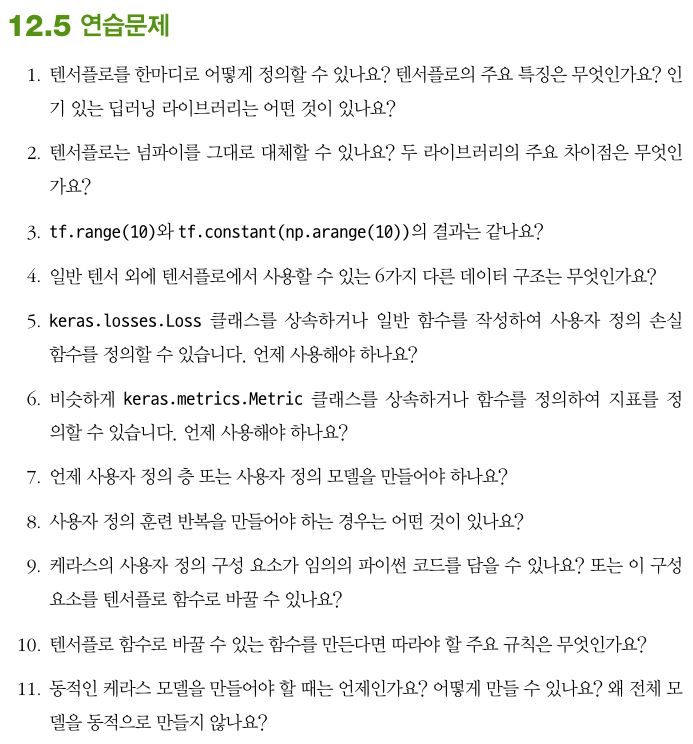

1. 텐서플로우는 수치 계산, 대규모 머신러닝에 잘 맞도록 튜닝된 오프소스 라이브러리. 넘파이와 비슷하지만 GPU지원. 분산 컴퓨팅과 그래프 분석과 최적화 시능 제공  
   후진 모드 자동 미분 기반의 최적화 API와 tf.keras, tf.data등의 API 제공  
   딥러닝 라이브러리로는 CNTK, MXNet, 파이토치 등이 있음
   
      
2. 넘파이 기능 대부분을 제공하지만 몇몇 함수 이름이 다르거나 동작이 달라 완벽 대체는 불가능.  
   ex: tf.traspose()는 텐서의 전치 복사복 생성, 넘파이의 T는 전치 뷰 생성  
   넘파이 배열은 생성 후 변경 가능하지만 텐서는 만든 후 변경 불가
   
   
3. 같긴 하지만 전자는 float32타입이고 후자는 float64타입이다. 텐서플로는 float32가 기본이고 넘파이는 float64가 기본이다


4. 희소텐서, 텐서 배열, 래그드 텐서, 큐, 문자열 텐서, 집합


5. 공식 API에서 지원하지 못하는 손실 함수를 구현해야 할 때  
   ex: 후버 손실은 tf.keras는 지원하지만 속싱 케라스 API에서는 지원하지 못함


6. 케라스의 지표 계산 방식이 요구사항에 맞지 않을 때.  
   ex: 정밀도는 진짜 양성 개수를 전체 양성 개수로 나눈 값 -> 양성 예측 5개 중 4개 일치 -> 정밀도 80%  
       정밀도가 배치가 진행될 수록 누적되는 스트리밍 지표 구현 등.


7. 텐서플로우에 없는 층을 가진 네트워크를 만들어야 할 때.  
   ex: 층 A, B, C가 반복된다고 할 때, A, B, C를 사용자 정의 층 D로 정의


8. 와이드 & 딥 네트워크 처럼 신경망의 일부분에 서로 다른 옵티마이저를 적용해야 하는 경우.  
   디버깅이나 훈련이 어떻게 작동하는지 이해하고 싶을 때
   
   
9. 


10. @tf.function 데코레이터 사용  
    텐서 플로우 함수 사용  
    임의의 코드를 실행하려면 tf.py_function으로 감싸기  
    for~ range(x) 대신에 for~ tf.range(x) 사용  
    반복문 보다 벡터화된 구현 사용


11. 

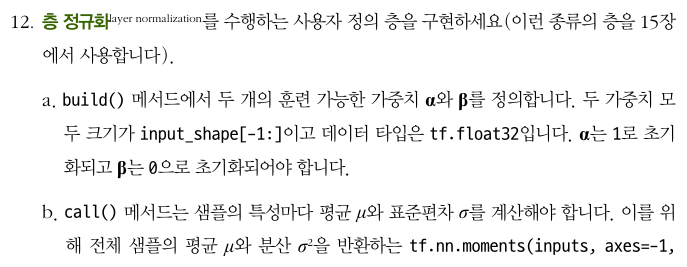
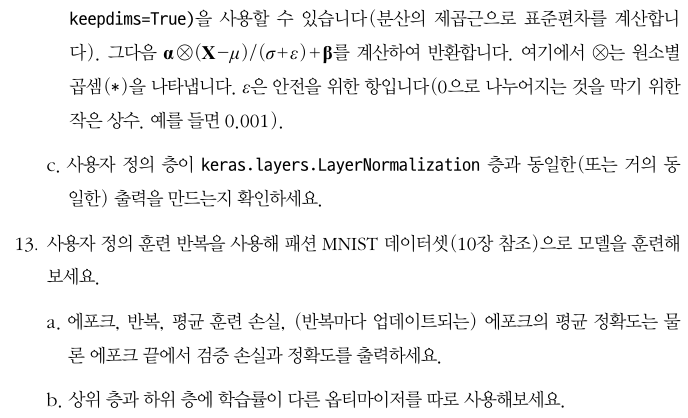

In [12]:
a = np.arange(6).reshape(2, 3)

a.shape[:-1], a.shape[-1:]

((2,), (3,))

In [19]:
#연습문제 12 - 층 정규화를 수행한느 사용자 정의 층을 구현

class LayerNormalization(keras.layers.Layer):
    def __init__(self, eps=0.001, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        
    def build(self, batch_input_shape):
        self.alpha = self.add_weight(
            name="alpha", shape=batch_input_shape[-1:],
            initializer="ones"
        )
        self.beta = self.add_weight(
            name="beta", shape=batch_input_shape[-1:],
            initializer="zeros"
        )
        super().build(batch_input_shape)
        
    def call(self, X):
        mean, variance = tf.nn.moments(X, axes=-1, keepdims=True)
        return self.alpha * (X - mean) / (tf.sqrt(variance + self.eps)) + self.beta
    
    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "eps": self.eps}

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [20]:
# keras.layers.LayerNomalization과 동일한지 확인

X = X_train.astype(np.float32)

custom_layer_norm = LayerNormalization()
keras_layer_norm = keras.layers.LayerNormalization()

tf.reduce_mean(keras.losses.mean_absolute_error(
    keras_layer_norm(X), custom_layer_norm(X)
))

<tf.Tensor: shape=(), dtype=float32, numpy=3.9829196e-08>

In [22]:
#알파와 베타를 완전히 랜덤하게 지정

random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_layer_norm.set_weights([random_alpha, random_beta])
keras_layer_norm.set_weights([random_alpha, random_beta])

tf.reduce_mean(keras.losses.mean_absolute_error(
    keras_layer_norm(X), custom_layer_norm(X)))

<tf.Tensor: shape=(), dtype=float32, numpy=1.6401204e-08>

매우 가까우므로 무시할 수 있는 수준

In [23]:
#연습문제 13 - 사용자 정의 훈련 반복을 사용해 패션 MNIST 데이터셋 사용

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.0

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test.astype(np.float32) / 255.0

In [24]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [29]:
#input_shape = np.array(X_train_full.shape[1:])

input_shape = X_train_full.shape[1:]

input_shape

(28, 28)

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [31]:
n_epochs = 5
batch_size=32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [35]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [37]:
from tqdm.notebook import trange
from collections import OrderedDict

with trange(1, n_epochs + 1, desc="All epochs") as epochs:  #with문을 나올 때 자동으로 close호출 C#의 using과 유사
    for epoch in epochs:
        with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train, y_train)
                with tf.GradientTape() as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))                    
                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                steps.set_postfix(status)
            y_pred = model(X_valid) #검증 세트에 대해서 모델 호출(=predict)
            status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
            status["val_accuracy"] = np.mean(keras.metrics.sparse_categorical_accuracy(
                tf.constant(y_valid, dtype=np.float32), y_pred))
            steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_states()


In [38]:
# 상위층과 하위 층에 학습률이 다른 옵티마이저 따로 사용

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [40]:
lower_layers = keras.models.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(100, activation="relu")
])

upper_layers = keras.models.Sequential([
    keras.layers.Dense(10, activation="softmax")
])

model = keras.models.Sequential([
    lower_layers,
    upper_layers
])

In [41]:
lower_optimizer = keras.optimizers.SGD(learning_rate=1e-4)
upper_optimizer = keras.optimizers.Nadam(learning_rate=1e-3)

In [42]:
n_epochs = 5
batch_size=32
n_steps = len(X_train) // batch_size
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [43]:
with trange(1, n_epochs + 1, desc="All epochs") as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train, y_train)
                with tf.GradientTape(persistent=True) as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                for layers, optimizer in ((lower_layers, lower_optimizer), #각 레이어 별로 다른 옵티마이저 적용
                                          (upper_layers, upper_optimizer)):
                    gradients = tape.gradient(loss, layers.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, layers.trainable_variables))
                del tape
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))                    
                status = OrderedDict()
                mean_loss(loss)
                status["loss"] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                steps.set_postfix(status)
            y_pred = model(X_valid)
            status["val_loss"] = np.mean(loss_fn(y_valid, y_pred))
            status["val_accuracy"] = np.mean(keras.metrics.sparse_categorical_accuracy(
                tf.constant(y_valid, dtype=np.float32), y_pred))
            steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_states()